# Lecture 1: Overview of the course and introduction to statistics 

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2023/24 data science class at the Rudjer Boskovic Institute, and it is available from [github](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture1.ipynb).


Note: this notebook contains code developed by Z. Ivezic, M. Juric, A. Connolly, B. Sippocz, Jake VanderPlas, G. Richards, and many many others.

<a id='toc'></a>

## This notebook includes:

[Motivation, Goals and Roadmap](#goals)

[IPython (jupyter) notebooks](#notebooks)

[Basics about statistics](#basics) 

[Distributions and Random samples](#randoms)

[Robust statistics](#robust) 

# Motivation, Goals and Roadmap for the Mini-Course: 
## "Bayesian statistics, Data Mining and Machine Learning"  <a id='goals'></a>
[Go to top](#toc)


### Motivation
    
These lectures will introduce course takers to most common statistical and computer science methods 
used in physics, astronomy, chemistry and other physical sciences. They will combine theoretical 
background with concrete examples of data analysis based on modern datasets. *This practical data 
analysis will be done using python tools and jupyter notebooks.*

While most practical examples are focused on astronomy, this course should be useful to all 
those interested in data analysis in physical sciences and engineering. The lectures are 
aimed at graduate and upper level undergraduate students, postdoctoral scientists. 
The main discussion topics are by and large based on Chapters 3-10, from the reference textbook
[Ivezić, Connolly, VanderPlas & Gray: Statistics, Data Mining, and Machine Learning in Astronomy:
A Practical Python Guide for the Analysis of Survey Data (Princeton University Press, 
2014)](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
 

By taking this course, attendees will develop working knowledge of topics such as robust 
statistics, hypothesis testing, maximum likelihood analysis, Bayesian statistics, model 
parameter estimation, the goodness of fit and model selection, density estimation and 
clustering, unsupervised and supervised classification, dimensionality reduction, regression 
and many more.
    
    
### Main Goals: 
1. Introduce pitfalls of working with real data, including robust statistics.  

2. Introduce the main data science concepts, such as the Maximum Likelihood Estimation method, 
   Bayesian statistics, supervised and unsupervised classification, dimensionality reduction, 
   and regression.

3. Using specific quantitative data-based examples, explore to a deeper and practical level
   all the above concepts.
   
   
### Roadmap: 
---------------------------------------------------------------------- 
[ Lecture 1, May 4, 2023: "Overview of the course and introduction to statistics"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture1.ipynb)  
- Motivation, Goals and Roadmap
- IPython (jupyter) notebooks
- Basics about statistics
- Distributions and Random samples
- Robust statistics
-----------------------------------------------------------------------------
[ Lecture 2, May 8, 2023: "Introduction to the Maximum Likelihood Estimation method"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture2.ipynb)  
- Introduction: what likelihood is and what it is good for?
- Simple examples of MLE: one-dimensional Gaussian
- MLE in action: fitting a parametrized model with heteroscedastic gaussian errors on y axis
- Goodness of fit
- Cost functions and penalized likelihood
- Non-gaussian likelihood: binomial distribution (coin flip problem)
- Conceptual difficulties with the MLE (example: "waiting for a bus" problem)
- What if we cannot write down the likelihood function?
-----------------------------------------------------------------------------
[ Lecture 3, May 11, 2023: "Introduction to Bayesian statistics and inference"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture3.ipynb)  
- Bayes Rule extended to Bayesian Inference
- The role of priors in Bayesian Inference
- A simple parameter estimation example
- Nuisance parameters and marginalization
-----------------------------------------------------------------------------
[ Lecture 4, May 15, 2023: "Applications of Bayesian statistics and inference"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture4.ipynb)  
- Simple parameter estimation examples
- Bayesian model selection
- Simple model selection examples
- For overachievers: ABC and Hierarchical Bayes
-----------------------------------------------------------------------------
[ Lecture 5, May 22, 2023: "Introduction to Markov Chain Monte Carlo"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture5.ipynb)  
- Introduction to MCMC
- Non-linear Regression with MCMC
-----------------------------------------------------------------------------
[ Lecture 6, June 1, 2023: "Bayesian model selection with MCMC"](https://github.com/ivezic/RBI2023/blob/main/notebooks/Lecture6.ipynb) 
- Model selection example: finding bursts in time series
- Bayesian Blocks Algorithm
-----------------------------------------------------------------------------


## A quick introduction to ipython (jupyter) notebooks  <a id='notebooks'></a>
[Go to top](#toc)


### Introduction

In this notebook, we'll cover some basic statistics and we'll fit a line to a set of data points with Gaussian uncertainties in one dimension.   

This worksheet is written in Python and it lives in an IPython [(jupyter)](https://jupyter.org)
notebook. In this context, you'll be asked to write a few lines of code to implement the sampler and the models but much of the boilerplate code is already in place. Therefore, even if you're not familiar with Python, you should be able to get something out of the notebook. I don't expect that everyone will finish the full notebook but that's fine because it has been designed to get more difficult as we progress.

### How to use the notebook

*If you're familiar with IPython notebooks, you can probably skip this section without missing anything.*

IPython notebooks work by running a fully functional Python sever behind the scenes and if you're reading this then you probably already figured out how to get that running. Then, inside the notebook, the content is divided into cells containing code or text.

You'll be asked to edit a few of the cells below to add your own code. To do this, click on the cell to start editing and then type as you normally would. To execute the code contained in the cell, press `Shift-Enter`. Even for existing cells that you don't need to edit, you should select them and type `Shift-Enter` when you get there because the cells below generally depend on the previous cells being executed first.

To get started, edit the cell below to assign your name (or whatever you want) to the variable `name` and then press `Shift-Enter` to execute the cell.

In [1]:
import os
name = os.getlogin()
print("Hello {0}!".format(name))

Hello ivezic!


If this works, the output should greet you without throwing any errors. If so, that's pretty much all we need so let's get started!

## Basics about statistics <a id='basics'></a>
[Go to top](#toc)

##### Learning goals: 
- Probability Rules (notation, definitions, conditional probability, Bayes Rule).
- How do I robustly estimate location and scale parameters of a one-dimensional data set?  
- Statistical distributions and how do we describe them? 
- Estimators, location and scale, sample vs. population, bias and scatter.

### Notation and Variables

First we need to go over some of the notation that the book uses.   

$x$ is a scalar quantity, measured $N$ times

$x_i$ is a single measurement with $i=1,...,N$

$\{x_i\}$ refers to the set of all N measurements

We are generally trying to *estimate* $h(x)$, the *true* distribution from which the values of $x$ are drawn. We will refer to $h(x)$ as the probability density (distribution) function or the "pdf" and $h(x)dx$ is the propobability of a value lying between $x$ and $x+dx$. 

While $h(x)$ is the "true" pdf (or **population** pdf).  What we *measure* from the data is the **empirical** pdf, which is denoted $f(x)$.  So, $f(x)$ is a *model* of $h(x)$.  In principle, with infinite data $f(x) \rightarrow h(x)$, but in reality measurement errors keep this from being strictly true.

### Parametric vs. Non-parametric

If we are attempting to guess a *model* for $h(x)$, then the process is *parametric*.  With a model solution we can generate new data that should mimic what we measure.

If we are not attempting to guess a model, then the process is *nonparametic*.  That is we are just trying to describe the data that we see in the most compact manner that we can, but we are not trying to produce mock data.

##  To summarize, we typically  

1) estimate $f(x)$ from some real (possibly multi-dimensional) data set, 

2) find a way to describe (analytically or not) $f(x)$ and its uncertainty, 

3) compare it to models of $h(x)$, and then 

4) use the knowledge that we have gained to "predict" and/or interpret new measurements.

## Probability

The probability of $A$, $p(A)$, is the probability that some event will happen (say a coin toss), or if the process is continuous, the probability of $A$ falling in a certain range.  (N.B., Technically these two things are different and sometimes are indicated by $P$ and $p$, but we'll ignore that here).

$p(A)$ must be positive definite for all $A$ and the sum/integral of the pdf must be unity.

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

$A \cup B$ is the *union* of sets $A$ and $B$.

$A \cap B$ is the *intersection* of sets $A$ and $B$.

The probability that *either* $A$ or $B$ will happen (which could include both) is the *union*, given by

$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$

The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  


The probability that *both* $A$ and $B$ will happen, $p(A \cap B)$, is 

$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$

where p(A|B) is the probability of A *given that* B is true and is called the *conditional probability*.  So the $|$ is short for "given that".

In other words: *"The probability that both A and B have occured is equal to the probability B has occured times the probability that A will occur if B occured".*

If events B_i are disjoint and their union is the set of all possible outcomes, then the **law of total probability** says that:

$$p(A) = \sum_ip(A|B_i)p(B_i)$$

Example:

    A = hit head on door frame, B = { is tall, is average, is short }
    P(A) = P(A|is tall) + P(B|is average) + P(C|is short)

N.B.  Just to be annoying, different people use different notation and the following all mean the same thing

$$p(A \cap B) = p(A,B) = p(AB) = p(A \,{\rm and}\, B)$$

We will use the comma notation as in the textbook.

It is important to realize that the following is *always* true
$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are ***independent***, then 

$$p(A,B) = p(A)p(B)$$

Example:

     David works at the Rudjer Boskovic Institute and Zeljko likes reggae music.
     
In other words, ***knowing A happened tells us nothing about whether B happened (or will happen), and vice versa***.

Let's look at another example.

If you have a bag with 5 marbles, 3 yellow and 2 blue and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability

$p(Y_2|Y_1) = \frac{2}{4}$, so that

$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then

$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 

$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

We say that two random variables, $A$ and $B$ are independent *if* $p(A,B) = p(A)p(B)$ 
(knowing $B$ does not give any information about $A$ and vice versa).




Here is a more complicated example from 
[Jo Bovy's class at UToronto](http://astro.utoronto.ca/%7Ebovy/teaching.html)
![Bovy_L1-StatMiniCourse_page21](figures/Bovy_L1-StatMiniCourse_page21.png)

As illustrated, 
$$p(A \,{\rm or}\, B|C) = p(A|C) + p(B|C) - p(A \, {\rm and}\, B|C)$$ 

This illustration also explains why $$p(x|y)p(y) = p(y|x)p(x)$$ (used below),
or in the notation of this figure: $$p(A \, {\rm and}\, B) \equiv p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$



Need more help with this? Try watching some Khan Academy videos and working through the exercises: https://www.khanacademy.org/math/probability/probability-geometry

https://www.khanacademy.org/math/precalculus/prob-comb

## Bayes' Rule

We've seen that the probability of $x$ and $y$ occurring can be written as:

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the ***marginal probability*** as

$$p(x) = \int p(x,y)dy,$$

where marginal means the probability of $x$ occurring irrespective what $y$ is. This is essentially projecting on to one axis (integrating over the other axis, see the figure in the Notebook, below).

Given these two, we can write:

$$p(x) = \int p(x|y)p(y) dy$$

This is just the law of total probability, but for continous variables.

**Note:** this is related to a much broader and deeper concept of Bayesian Statistics,
which we will introduce in Lecture 12.

## Marginal and contitional probability distributions

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The *marginal* distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the *conditional* probability (of $x$) for three $y$ values: $$p(x|y=y_0)$$  
(using the same color coding).
These are just "slices" through the 2-D distribution.

![conditional probability](figures/fig_conditional_probability_1.png)



Then, again starting with:

$$p(x|y)p(y) = p(y|x)p(x)$$

we can write:

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss later (first in Lecture 12). 

## Example: Contingency Table

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's say that we have a test for a disease.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this 2x2 p(T=0 or 1|D=0 or 1) matrix is:
![](figures/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D$ = 0.01. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *data*, $p(T=1|D=1)$. What we want is the conditional probability of the *data* given the *test*, that is, $p(D=1|T=1)$.

Bayes' rule then can be used to help us determine how likely it is 
that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive! 

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease
(not 98%!). 

Same math, with often surprising results, applies to DNA tests of murder suspects...

## Distributions and Random samples <a id='randoms'></a>
[Go to top](#toc)

##### Learning goals: 
- How do I use python to generate various statistical distributions, such as Cauchy, Laplace, etc.? 

## Statistical distributions

Typically, we collect some *samples* (series of measurements, or catalogs of stars) that can be thought of as being drawn from som underlying distribution (e.g., distribution of errors, or the distribution of stars in the Milky Way).

We often don't care much about the individual samples, other than to use them ***to learn more about the underlying distributions and their properties (e.g., the mean (location), width (scale), etc.)***. How do we do that?

![SlideGrab](figures/p5.jpg)

Normal probability density function (pdf): $$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

Cumulative distribution function (cdf): $$\Phi(x|\mu,\sigma) = \int_{-\infty}^{x}  p(x'|\mu,\sigma) dx' $$
$$\Phi(\infty|\mu,\sigma) = 1.$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

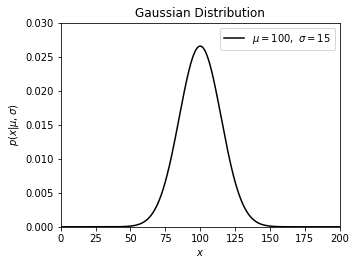

In [3]:
## Let's start with the Gaussian - or the Normal distribution, N(mu,sigma)
## see http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html
## 
## This example: IQ is (by definition) distributed as N(mu=100,sigma=15)
## Let's plot the IQ distribution first
# 
# generate distribution for a grid of x values
x = np.linspace(0, 200, 1000)
mu=100
sigma=15
gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

In [4]:
## above we used probability density function (astronomers like to call it "differential" df)
## the cumulative distribution function, cdf, is the integral of pdf from $x'=-\infty$ to $x'=x$
# What fraction of people have IQ>145 (in other words, what fraction of people are "3-sigma" above the average?
gaussCDF = norm(mu, sigma).cdf(145)
print (1-gaussCDF)

0.0013498980316301035


In [5]:
# What IQ corresponds to a "one in a million people genius"? 
nSigma = norm.ppf(1-1.0e-6)
# norm.ppf returns x for specified cdf, assuming mu=0 and sigma=1 ("standard normal pdf")
IQ = mu + nSigma*sigma
print('nSigma=',nSigma)
print('IQ=', IQ)

nSigma= 4.753424308817087
IQ= 171.3013646322563


In [6]:
# let's now look at the same problems using a sample of million points drawn from N(100,15)
sampleSize=1000000 
gaussSample = norm(mu, sigma).rvs(sampleSize) 
# What fraction of people have IQ>145?
smartOnes = gaussSample[gaussSample>145]
print (1.0*np.size(smartOnes)/sampleSize)

0.001337


In [7]:
# What IQ corresponds to "one in a million"?  
print(np.max(gaussSample))

176.84587622891655


## Why do the two sets of results differ (0.00135 vs. 0.00138 and 171.3 vs. 176.8)?

In [8]:
def printStats(v):
    print('  Size:', np.size(v))
    print('   min:', np.min(v))
    print('   max:', np.max(v))
    print('  mean:', np.mean(v))
    print('median:', np.median(v))
    print('st.dev:', np.std(v))

In [9]:
printStats(gaussSample)

  Size: 1000000
   min: 29.72200925126174
   max: 176.84587622891655
  mean: 99.99826937733395
median: 100.00389172076855
st.dev: 15.0029757536907


In [10]:
printStats(smartOnes)

  Size: 1337
   min: 145.00952610226042
   max: 176.84587622891655
  mean: 149.202113182793
median: 148.10748003104467
st.dev: 3.932758359992608


In [11]:
# What about the other end of the spectrum?
print('N(50 < IQ < 71):    ', np.size(gaussSample[(gaussSample>50) & (gaussSample<71)]))
print('N(26 < IQ < 51):    ', np.size(gaussSample[(gaussSample>26) & (gaussSample<51)]))

N(50 < IQ < 71):     26427
N(26 < IQ < 51):     543


### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is
$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$
For $a=b=1\sigma$, we get the familar result of 68.3%.  For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits**, respectively.

## Now let's go back to the problem of estimating location and scale:
## given a sample, such as gaussSample above, how do we estimate its $\mu$ and $\sigma$?

![SlideGrab](figures/p4.jpg)

![SlideGrab](figures/p3.jpg)

### Sample vs. Population Statistics 

Statistics estimated from the *data* are called _sample statistics_ as compared to _population statistics_ which come from knowing the functional form of the pdf. For example, the expectation value for a known h(x) is

$$\mu \equiv E(x) = \int_{-\infty}^{\infty} x h(x) dx,$$

where $h(x)$ must be properly normalized (the integral gets replaced by a sum for discrete distributions).

E(x) is the expecation value of $x$.  If you want the expectation value of something else--say $x^2$ or $(x-\mu)^2$, you replace $x$ with that. Importantly, the *variance* is the expectation value of $(x-\mu)^2$

$$\sigma^2 \equiv V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where, again, the integral gets replaced by a sum for discrete distributions.

Specifically, $\mu$ is the *population average*, i.e., it is the expecation value of $x$ for $h(x)$.  But we don't *know* $h(x)$! So we do the next best thing, and estimate it from the data:

$$ \hat{h}(x) = \sum_{i=1}^N \frac{\delta_(x - x_i)}{N}$$

Plugging into the previous equations, we derive the **sample mean**, $\overline{x}$ as an *estimator* of $\mu$ and defined as
$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$
which we determine from the data itself. We'll hear more about estimators in Week 4.

Similarly, the **sample variance** ($s^2$, where 
$s$ is the sample standard deviation) is an *estimator* of $\sigma^2$:
$$s^2 \equiv \frac{1}{N-1}\sum_{i=1}^N (x_i-\overline{x})^2.$$

**WAIT!!!** Why do we have (N-1) and not N (as in expression for the mean)???

The reason for the (N-1) term instead of the naively expected N in the second expression is related to the fact that $\overline{x}$ is also determined from data (we will discuss this subtle fact and the underlying statistical justification for the (N-1) term in more detail in Week 4 lectures. With N replaced by (N-1) (the so-called Bessel’s correction), the sample variance (i.e., $\sigma^2$) becomes unbiased (and the sample standard deviation becomes a less biased, but on average still underestimated, estimator of the true standard deviation). 

**What does "biased" mean?**

![SlideGrab](figures/p13.jpg)

![SlideGrab](figures/p10.jpg)

![SlideGrab](figures/p11.jpg)

![SlideGrab](figures/p12.jpg)

![SlideGrab](figures/p8.jpg)

## WARNING: do not overinterpret simple statistics!

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. 

![SlideGrab](figures/AnscombeQuartet.jpg)

![SlideGrab](figures/AnscombeQuartetTable.jpg)



## Robust statistics <a id='robust'></a>
[Go to top](#toc)

##### Learning goals: 
- How do I *robustly* estimate location and scale parameters of a one-dimensional data set?  

**Robust** here means insensitive to outliers; for example, a single data point 
in a sample with a value going to infinity will result in the sample mean also
going to infinity -- therefore, the sample mean is **not** a robust estimator.

However, the sample median **is** a robust estimator: not only a single data point,
but essentially 50% of all points can have values going to infinity and the sample median
will remain unchanged! 

Similarly, to estimate the distribution width, instead of using standard deviation we
can use the interquartile range.  

## As an example, we will use Cauchy (Lorentz) distribution
### This distribution has so slowly decreasing tails (1/x) that it doesn't have a well defined second moment.
### Therefore, the promises from the Central Limit Theorem do not hold and mean doesn't converge to the
### true location parameter with 1/sqrt(N).

In [12]:
from scipy.stats import cauchy
def plotfun(f, xmin=0, xmax=1, npts=1000):
    x = np.linspace(xmin, xmax, npts)
    plt.figure(figsize=(14, 8))
    plt.plot(x, f(x))

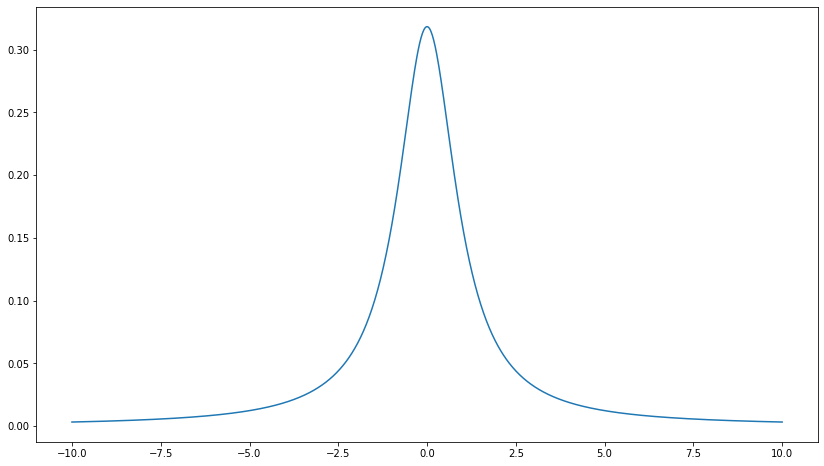

In [13]:
plotfun(cauchy.pdf, -10, 10)

![SlideGrab](figures/p22.pdf) 

In [14]:
from scipy.stats import cauchy, norm
from scipy import optimize
from astroML.stats import sigmaG

In [15]:
def robust_mean_mixture(x):
    """Compute the mean via a mixture of two Gaussians

    One Gaussian accounts for outliers, and one Gaussian accounts  for
    the true distribution.  This cannot be computed analytically, so
    it uses scipy's function optimization
    """
    if len(x) == 1:
        return x

    x = x.ravel()

    mu_bg = np.mean(x)
    sig_bg = 3 * np.std(x)

    likelihood = lambda v: -np.sum(np.log(norm.pdf(x, v[0], v[1])
                                          + norm.pdf(x, mu_bg, sig_bg)))

    v0 = np.array([0, 30])

    v_best = optimize.fmin(likelihood, v0, disp=False)

    return v_best[0]


def robust_mean_iterated(x, sigma_cut=3):
    """Compute the robust mean iteratively

    After computing the mean, points further than 3 sigma from the mean
    are removed and the result is repeated until convergence.
    """
    flag = np.ones(x.shape, dtype=bool)
    n_to_keep = x.size

    while True:
        xf = x[flag]
        mu = xf.mean()
        sig = xf.std()
        if len(xf) == 1:
            break

        x_sig = abs((x - mu) / sig)

        too_far = (x_sig > sigma_cut)
        flag[too_far] = False
        n_flag = flag.sum()

        if n_flag == n_to_keep:
            break
        else:
            n_to_keep = n_flag

    return mu
 

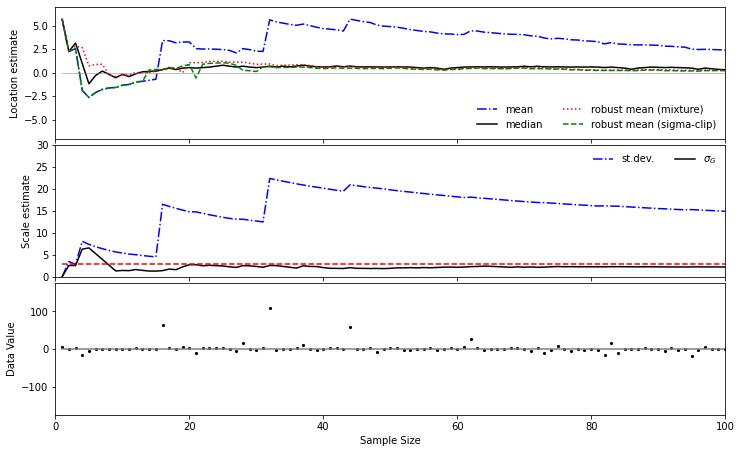

In [16]:
#------------------------------------------------------------
# Create the distribution and compute means and medians
np.random.seed(6)
mu = 0
gamma = 2

xi = cauchy(mu, gamma).rvs(100)
Nrange = np.arange(1, len(xi) + 1)

mean = [np.mean(xi[:N]) for N in Nrange]
median = [np.median(xi[:N]) for N in Nrange]
mean_mixture = [robust_mean_mixture(xi[:N]) for N in Nrange]
mean_iter = [robust_mean_iterated(xi[:N]) for N in Nrange]

# additions
stdev = [np.std(xi[:N]) for N in Nrange]
sigG = [sigmaG(xi[:N]) for N in Nrange]

# Plot the results as a function of number of points
fig = plt.figure(figsize=(12, 7.5))
fig.subplots_adjust(hspace=0.05)

# first plot the mean and median
ax = fig.add_subplot(311)
ax.plot(Nrange, mean, '-.b', label='mean')
ax.plot(Nrange, median, '-k', label='median')
ax.plot(Nrange, mean_mixture, ':r', label='robust mean (mixture)')
ax.plot(Nrange, mean_iter, '--g', label='robust mean (sigma-clip)')
ax.plot(Nrange, 0 * Nrange, '-', c='gray', lw=0.5)

ax.set_xlim(0, 100)
ax.set_ylim(-7, 7)
ax.legend(loc=4, ncol=2, frameon=False)
ax.set_ylabel('Location estimate')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# and here plot the sigma and sigmaG
ax = fig.add_subplot(312)
ax.plot(Nrange, stdev, '-.b', label='st.dev.')
ax.plot(Nrange, sigG, '-k', label='$\sigma_G$')
## sigmaG for Cauchy distribution
ax.plot(Nrange, (1.483*gamma+0 * Nrange), '--', c='red')
ax.set_xlim(0, 100)
ax.set_ylim(0, 30)
ax.legend(loc='upper right', ncol=2, frameon=False)
ax.set_ylabel('Scale estimate')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# now plot the data values
ax = fig.add_subplot(313)
ax.scatter(Nrange, xi, lw=0, s=10, c='k')
ax.plot(Nrange, 0 * Nrange, '-', c='gray')
ax.set_xlim(0, 100)
ax.set_ylim(-175, 175)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Data Value')
plt.show()

## Next time: Maximum Likelihood Estimation (MLE) Method<a id='ML'></a>
[Go to top](#toc)